#**Mathematics in Machine Learning - Part 2 Preparation & Models**

Politecnico di Torino

Alberto Maria Falletta S277971 


**Imports**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**IRRELEVANT FEATURES REMOVAL**

In [ ]:
path = "/content/bank-additional-full.csv"
pd.set_option("display.max_columns", None)

df = pd.read_csv(path, delimiter=';')

# Mapping '999' (= never contacted) to '-1' for visualization reasons
df['pdays'] = df['pdays'].replace(999, -1)

print(f"Total number of 'unknown' values before columns dropping: {len(df[(df['job'] == 'unknown')]) + len(df[(df['marital'] == 'unknown')]) + len(df[(df['education'] == 'unknown')]) + len(df[(df['housing'] == 'unknown')])}")
print(f"Number of records with at least one 'unknown' value before columns dropping: {len(df[(df['job'] == 'unknown') | (df['marital']== 'unknown') | (df['education']== 'unknown') | (df['housing']== 'unknown') ])}")
print(f"Total number of elements: {df.shape}", "\n")

df = df.drop(['duration', 'default', 'loan'], axis=1)

print(f"Dataset total number of records: {df.shape}")
print(f"Presence of Nan values: {df.isnull().values.any()}")
print(f"Total number of 'unknown' values: {len(df[(df['job'] == 'unknown')]) + len(df[(df['marital'] == 'unknown')]) + len(df[(df['education'] == 'unknown')]) + len(df[(df['housing'] == 'unknown')])}")
print(f"Number of records with at least one 'unknown' value: {len(df[(df['job'] == 'unknown') | (df['marital']== 'unknown') | (df['education']== 'unknown') | (df['housing']== 'unknown') ])}")
print(f"Total number of elements: {df.shape}", "\n")

df_yes = df[df['y'] == "yes"]
df_no = df[df['y'] == "no"]

print(f"Total number of 'unknown' values for Yes: {len(df_yes[(df_yes['job'] == 'unknown')]) + len(df_yes[(df_yes['marital'] == 'unknown')]) + len(df_yes[(df_yes['education'] == 'unknown')]) + len(df_yes[(df_yes['housing'] == 'unknown')])}")
print(f"Number of records with at least one 'unknown' value for Yes: {len(df_yes[(df_yes['job'] == 'unknown') | (df_yes['marital']== 'unknown') | (df_yes['education']== 'unknown') | (df_yes['housing']== 'unknown') ])}")
print(f"Total number of elements for Yes: {df_yes.shape}", "\n")

print(f"Total number of 'unknown' values for No: {len(df_no[(df_no['job'] == 'unknown')]) + len(df_no[(df_no['marital'] == 'unknown')]) + len(df_no[(df_no['education'] == 'unknown')]) + len(df_no[(df_no['housing'] == 'unknown')])}")
print(f"Number of records with at least one 'unknown' value for No: {len(df_no[(df_no['job'] == 'unknown') | (df_no['marital']== 'unknown') | (df_no['education']== 'unknown') | (df_no['housing']== 'unknown') ])}")
print(f"Total number of elements for No: {df_no.shape}", "\n")

Total number of 'unknown' values before columns dropping: 3131
Number of records with at least one 'unknown' value before columns dropping: 2943
Total number of elements: (41188, 21) 

Dataset total number of records: (41188, 18)
Presence of Nan values: False
Total number of 'unknown' values: 3131
Number of records with at least one 'unknown' value: 2943
Total number of elements: (41188, 18) 

Total number of 'unknown' values for Yes: 407
Number of records with at least one 'unknown' value for Yes: 382
Total number of elements for Yes: (4640, 18) 

Total number of 'unknown' values for No: 2724
Number of records with at least one 'unknown' value for No: 2561
Total number of elements for No: (36548, 18) 



**OUTLIERS REMOVAL**

In [ ]:
print(f"Total number of removed outliers for Yes: {df_yes[df_yes['age'] >= 79].shape}")
df_yes = df_yes[df_yes['age'] < 79]
print(f"Total number of removed outliers for No: {df_no[df_no['age'] >= 70].shape}", "\n")
df_no = df_no[df_no['age'] < 70] 

df = pd.concat([df_no, df_yes])
print(f"Number of records after outliers removal: {df.shape}")

print(f"Total number of 'unknown' values for Yes: {len(df_yes[(df_yes['job'] == 'unknown')]) + len(df_yes[(df_yes['marital'] == 'unknown')]) + len(df_yes[(df_yes['education'] == 'unknown')]) + len(df_yes[(df_yes['housing'] == 'unknown')])}")
print(f"Number of records with at least one 'unknown' value for Yes: {len(df_yes[(df_yes['job'] == 'unknown') | (df_yes['marital']== 'unknown') | (df_yes['education']== 'unknown') | (df_yes['housing']== 'unknown') ])}")
print(f"Total number of elements for Yes: {df_yes.shape}", "\n")

print(f"Total number of 'unknown' values for No: {len(df_no[(df_no['job'] == 'unknown')]) + len(df_no[(df_no['marital'] == 'unknown')]) + len(df_no[(df_no['education'] == 'unknown')]) + len(df_no[(df_no['housing'] == 'unknown')])}")
print(f"Number of records with at least one 'unknown' value for No: {len(df_no[(df_no['job'] == 'unknown') | (df_no['marital']== 'unknown') | (df_no['education']== 'unknown') | (df_no['housing']== 'unknown') ])}")
print(f"Total number of elements for No: {df_no.shape}", "\n")

Total number of removed outliers for Yes: (84, 18)
Total number of removed outliers for No: (248, 18) 

Number of records after outliers removal: (40856, 18)
Total number of 'unknown' values for Yes: 393
Number of records with at least one 'unknown' value for Yes: 370
Total number of elements for Yes: (4556, 18) 

Total number of 'unknown' values for No: 2702
Number of records with at least one 'unknown' value for No: 2540
Total number of elements for No: (36300, 18) 



**UNKNOWN VALUES REMOVAL**

In [ ]:
print(f"Number of records to be removed: {df[(df['job'] == 'unknown') | (df['marital']== 'unknown') | (df['education']== 'unknown') | (df['housing']== 'unknown')].shape}")
df = df[(df['job'] != 'unknown') & (df['marital'] != 'unknown') & (df['education'] != 'unknown') & (df['housing'] != 'unknown')]
print(f"Number of records and features: {df.shape}")

Number of records to be removed: (2910, 18)
Number of records and features: (37946, 18)


**ONE HOT ENCODING**

In [ ]:
# Categorical variables encoding
df = pd.concat([df, pd.get_dummies(df['job'], prefix='job')], axis=1).drop(['job'], axis=1)
df = pd.concat([df, pd.get_dummies(df['marital'], prefix='marital')], axis=1).drop(['marital'], axis=1)
df = pd.concat([df, pd.get_dummies(df['education'], prefix='education')], axis=1).drop(['education'], axis=1)
df = pd.concat([df, pd.get_dummies(df['housing'], prefix='housing')], axis=1).drop(['housing'], axis=1)
df = pd.concat([df, pd.get_dummies(df['contact'], prefix='contact')], axis=1).drop(['contact'], axis=1)
df = pd.concat([df, pd.get_dummies(df['month'], prefix='month')], axis=1).drop(['month'], axis=1)
df = pd.concat([df, pd.get_dummies(df['day_of_week'], prefix='day_of_week')], axis=1).drop(['day_of_week'], axis=1)
df = pd.concat([df, pd.get_dummies(df['poutcome'], prefix='poutcome')], axis=1).drop(['poutcome'], axis=1)

# Class variable encoding
df.loc[df["y"] == 'yes', "y"] = 1
df.loc[df["y"] == 'no', "y"] = 0

# Prints
print(f"Number of records class 'Yes': {len(df[df['y'] == 1])}")
print(f"Number of records class 'No': {len(df[df['y'] == 0])}")
# print(df.head(), "\n")
print(f"Number of records and features: {df.shape}")

Number of records class 'Yes': 4186
Number of records class 'No': 33760
Number of records and features: (37946, 53)


**TRAINING + VALIDATION & TEST SPLITS**

In [ ]:
# Division in training-validation and test sets mantaining proportions
df_yes = df[df['y'] == 1].sample(frac=1)
df_no = df[df['y'] == 0].sample(frac=1)

df_yes_train_valid = df_yes.iloc[837:, : ]  
df_yes_test = df_yes.iloc[:837, :]  # 837 is 20 % 

df_no_train_valid = df_no.iloc[6752:, : ]
df_no_test = df_no.iloc[:6752, :]  # 6752 is 20 %

# Train-Valid set creation and shuffle
df_train_valid = pd.concat([df_yes_train_valid, df_no_train_valid]).sample(frac=1)

# Test set creation and shuffle + partition data & labels
df_test = pd.concat([df_yes_test, df_no_test]).sample(frac=1)
y_test = df_test['y'].astype('int')
df_test = df_test.drop('y', axis=1)

print(df_train_valid.shape)

(30357, 53)


**CUSTOM CROSS-VALIDATION, OVER-SAMPLING AND MODELS**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import ParameterGrid
import json

df_yes = df_train_valid[df_train_valid['y'] == 1].sample(frac=1)
df_no = df_train_valid[df_train_valid['y'] == 0].sample(frac=1)

# 5 Folds with equal proportionality of classes
step_yes = len(df_yes) // 5
df_yes_1 = df_yes.iloc[:step_yes, : ]
df_yes_2 = df_yes.iloc[step_yes:2*step_yes, : ]
df_yes_3 = df_yes.iloc[2*step_yes:3*step_yes, : ]
df_yes_4 = df_yes.iloc[3*step_yes:4*step_yes, : ]
df_yes_5 = df_yes.iloc[4*step_yes:, : ]

step_no = len(df_no) // 5
df_no_1 = df_no.iloc[:step_no, : ]
df_no_2 = df_no.iloc[step_no:2*step_no, : ]
df_no_3 = df_no.iloc[2*step_no:3*step_no, : ]
df_no_4 = df_no.iloc[3*step_no:4*step_no, : ]
df_no_5 = df_no.iloc[4*step_no:, : ]

df_train_valid_1 = pd.concat([df_yes_1, df_no_1]).sample(frac=1)
df_train_valid_2 = pd.concat([df_yes_2, df_no_2]).sample(frac=1)
df_train_valid_3 = pd.concat([df_yes_3, df_no_3]).sample(frac=1)
df_train_valid_4 = pd.concat([df_yes_4, df_no_4]).sample(frac=1)
df_train_valid_5 = pd.concat([df_yes_5, df_no_5]).sample(frac=1)

cl1_accuracy = {}
cl2_accuracy = {}
cl3_accuracy = {}
cl4_accuracy = {}

cl1_recall = {}
cl2_recall = {}
cl3_recall = {}
cl4_recall = {}

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Training 1 -------------------------------------------------------------------
print("Training 1")
# Datasets composition
df_train = pd.concat([df_train_valid_1, df_train_valid_2, df_train_valid_3, df_train_valid_4]).sample(frac=1)
df_valid = df_train_valid_5

# Variables separation
y = df_train['y']
X = df_train.drop('y', axis=1)
y_valid = df_valid['y'].astype('int')
X_valid = df_valid.drop('y', axis=1)

# Oversampling
X_oversampled, y_oversampled = SMOTE().fit_resample(X, y)
X_oversampled = pd.DataFrame(X_oversampled, columns=X.columns)
y_oversampled = pd.DataFrame(y_oversampled, columns=["y"]).astype('int')

# Training
print("\n", "clf1", "\n")
hyp_parameters = {
  "penalty": ["l1", "l2"],
  "C": [1, 10, 100],
  "max_iter": [1000]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_1 = LogisticRegression()
  clf_1.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_1 = clf_1.predict(X_valid)
  cl1_accuracy[json.dumps(config)] = accuracy_score(y_valid, y_pred_1)
  cl1_recall[json.dumps(config)] = recall_score(y_valid, y_pred_1, pos_label=1)

print("\n", "clf2", "\n")
hyp_parameters = {
  "criterion": ["gini", "entropy"],
  "max_depth": [None, 15],
  "max_features": [None, "sqrt"]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_2 = DecisionTreeClassifier(**config)
  clf_2.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_2 = clf_2.predict(X_valid)
  cl2_accuracy[json.dumps(config)] = accuracy_score(y_valid, y_pred_2)
  cl2_recall[json.dumps(config)] = recall_score(y_valid, y_pred_2, pos_label=1)

print("\n", "clf3", "\n")
hyp_parameters = {
  "criterion": ["gini", "entropy"],
  "n_estimators": [100],
  "max_depth": [None, 15],
  "max_features": [None, "sqrt"]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_3 = RandomForestClassifier(**config)
  clf_3.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_3 = clf_3.predict(X_valid)
  cl3_accuracy[json.dumps(config)] = accuracy_score(y_valid, y_pred_3)
  cl3_recall[json.dumps(config)] = recall_score(y_valid, y_pred_3, pos_label=1)

print("\n", "clf4", "\n")
hyp_parameters = {
  "C": [1, 50],
  "kernel": ["linear", "rbf"],
  "gamma": ["scale", "auto"]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_4 = SVC(**config)
  clf_4.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_4 = clf_4.predict(X_valid)
  cl4_accuracy[json.dumps(config)] = accuracy_score(y_valid, y_pred_4)
  cl4_recall[json.dumps(config)] = recall_score(y_valid, y_pred_4, pos_label=1)

print("\n", "TRAINING 1 RESULTS", "\n")
print(cl1_accuracy)
print(cl2_accuracy)
print(cl3_accuracy)
print(cl4_accuracy)

print(cl1_recall)
print(cl2_recall)
print(cl3_recall)
print(cl4_recall)

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))


Training 1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



 clf1 

Current training: {'C': 1, 'max_iter': 1000, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 10, 'max_iter': 1000, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 100, 'max_iter': 1000, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



 clf2 

Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': None}
Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': None}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': None, 'max_features': None}
Current training: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': 15, 'max_features': None}
Current training: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}

 clf3 

Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 100}
Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'n_estimators': 100}
Current training

In [ ]:
# Training 2 -------------------------------------------------------------------
print("Training 2")
# Datasets composition
df_train = pd.concat([df_train_valid_1, df_train_valid_2, df_train_valid_3, df_train_valid_5]).sample(frac=1)
df_valid = df_train_valid_4

# Variables separation
y = df_train['y']
X = df_train.drop('y', axis=1)
y_valid = df_valid['y'].astype('int')
X_valid = df_valid.drop('y', axis=1)

# Oversampling
X_oversampled, y_oversampled = SMOTE().fit_resample(X, y)
X_oversampled = pd.DataFrame(X_oversampled, columns=X.columns)
y_oversampled = pd.DataFrame(y_oversampled, columns=["y"]).astype('int')

# Training
print("\n", "clf1", "\n")
hyp_parameters = {
  "penalty": ["l1", "l2"],
  "C": [1, 10, 100],
  "max_iter": [1000]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_1 = LogisticRegression()
  clf_1.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_1 = clf_1.predict(X_valid)
  cl1_accuracy[json.dumps(config)] += accuracy_score(y_valid, y_pred_1)
  cl1_recall[json.dumps(config)] += recall_score(y_valid, y_pred_1, pos_label=1)

print("\n", "clf2", "\n")
hyp_parameters = {
  "criterion": ["gini", "entropy"],
  "max_depth": [None, 15],
  "max_features": [None, "sqrt"]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_2 = DecisionTreeClassifier(**config)
  clf_2.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_2 = clf_2.predict(X_valid)
  cl2_accuracy[json.dumps(config)] += accuracy_score(y_valid, y_pred_2)
  cl2_recall[json.dumps(config)] += recall_score(y_valid, y_pred_2, pos_label=1)

print("\n", "clf3", "\n")
hyp_parameters = {
  "criterion": ["gini", "entropy"],
  "n_estimators": [100],
  "max_depth": [None, 15],
  "max_features": [None, "sqrt"]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_3 = RandomForestClassifier(**config)
  clf_3.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_3 = clf_3.predict(X_valid)
  cl3_accuracy[json.dumps(config)] += accuracy_score(y_valid, y_pred_3)
  cl3_recall[json.dumps(config)] += recall_score(y_valid, y_pred_3, pos_label=1)

print("\n", "clf4", "\n")
hyp_parameters = {
  "C": [1, 50],
  "kernel": ["linear", "rbf"],
  "gamma": ["scale", "auto"]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_4 = SVC(**config)
  clf_4.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_4 = clf_4.predict(X_valid)
  cl4_accuracy[json.dumps(config)] += accuracy_score(y_valid, y_pred_4)
  cl4_recall[json.dumps(config)] += recall_score(y_valid, y_pred_4, pos_label=1)

print("\n", "TRAINING 2 RESULTS", "\n")
print(cl1_accuracy)
print(cl2_accuracy)
print(cl3_accuracy)
print(cl4_accuracy)

print(cl1_recall)
print(cl2_recall)
print(cl3_recall)
print(cl4_recall)

Training 2


/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



 clf1 

Current training: {'C': 1, 'max_iter': 1000, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 10, 'max_iter': 1000, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 100, 'max_iter': 1000, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



 clf2 

Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': None}
Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': None}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': None, 'max_features': None}
Current training: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': 15, 'max_features': None}
Current training: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}

 clf3 

Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 100}
Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'n_estimators': 100}
Current training

In [ ]:
# Training 3 -------------------------------------------------------------------
print("Training 3")
# Datasets composition
df_train = pd.concat([df_train_valid_1, df_train_valid_2, df_train_valid_4, df_train_valid_5]).sample(frac=1)
df_valid = df_train_valid_3

# Variables separation
y = df_train['y']
X = df_train.drop('y', axis=1)
y_valid = df_valid['y'].astype('int')
X_valid = df_valid.drop('y', axis=1)

# Oversampling
X_oversampled, y_oversampled = SMOTE().fit_resample(X, y)
X_oversampled = pd.DataFrame(X_oversampled, columns=X.columns)
y_oversampled = pd.DataFrame(y_oversampled, columns=["y"]).astype('int')

# Training
print("\n", "clf1", "\n")
hyp_parameters = {
  "penalty": ["l1", "l2"],
  "C": [1, 10, 100],
  "max_iter": [1000]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_1 = LogisticRegression()
  clf_1.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_1 = clf_1.predict(X_valid)
  cl1_accuracy[json.dumps(config)] += accuracy_score(y_valid, y_pred_1)
  cl1_recall[json.dumps(config)] += recall_score(y_valid, y_pred_1, pos_label=1)

print("\n", "clf2", "\n")
hyp_parameters = {
  "criterion": ["gini", "entropy"],
  "max_depth": [None, 15],
  "max_features": [None, "sqrt"]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_2 = DecisionTreeClassifier(**config)
  clf_2.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_2 = clf_2.predict(X_valid)
  cl2_accuracy[json.dumps(config)] += accuracy_score(y_valid, y_pred_2)
  cl2_recall[json.dumps(config)] += recall_score(y_valid, y_pred_2, pos_label=1)

print("\n", "clf3", "\n")
hyp_parameters = {
  "criterion": ["gini", "entropy"],
  "n_estimators": [100],
  "max_depth": [None, 15],
  "max_features": [None, "sqrt"]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_3 = RandomForestClassifier(**config)
  clf_3.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_3 = clf_3.predict(X_valid)
  cl3_accuracy[json.dumps(config)] += accuracy_score(y_valid, y_pred_3)
  cl3_recall[json.dumps(config)] += recall_score(y_valid, y_pred_3, pos_label=1)

print("\n", "clf4", "\n")
hyp_parameters = {
  "C": [1, 50],
  "kernel": ["linear", "rbf"],
  "gamma": ["scale", "auto"]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_4 = SVC(**config)
  clf_4.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_4 = clf_4.predict(X_valid)
  cl4_accuracy[json.dumps(config)] += accuracy_score(y_valid, y_pred_4)
  cl4_recall[json.dumps(config)] += recall_score(y_valid, y_pred_4, pos_label=1)

print("\n", "TRAINING 3 RESULTS", "\n")
print(cl1_accuracy)
print(cl2_accuracy)
print(cl3_accuracy)
print(cl4_accuracy)

print(cl1_recall)
print(cl2_recall)
print(cl3_recall)
print(cl4_recall)

Training 3


/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



 clf1 

Current training: {'C': 1, 'max_iter': 1000, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 10, 'max_iter': 1000, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 100, 'max_iter': 1000, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



 clf2 

Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': None}
Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': None}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': None, 'max_features': None}
Current training: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': 15, 'max_features': None}
Current training: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}

 clf3 

Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 100}
Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'n_estimators': 100}
Current training

In [ ]:
# Training 4 -------------------------------------------------------------------
print("Training 4")
# Datasets composition
df_train = pd.concat([df_train_valid_1, df_train_valid_4, df_train_valid_3, df_train_valid_5]).sample(frac=1)
df_valid = df_train_valid_2

# Variables separation
y = df_train['y']
X = df_train.drop('y', axis=1)
y_valid = df_valid['y'].astype('int')
X_valid = df_valid.drop('y', axis=1)

# Oversampling
X_oversampled, y_oversampled = SMOTE().fit_resample(X, y)
X_oversampled = pd.DataFrame(X_oversampled, columns=X.columns)
y_oversampled = pd.DataFrame(y_oversampled, columns=["y"]).astype('int')

# Training
print("\n", "clf1", "\n")
hyp_parameters = {
  "penalty": ["l1", "l2"],
  "C": [1, 10, 100],
  "max_iter": [1000]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_1 = LogisticRegression()
  clf_1.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_1 = clf_1.predict(X_valid)
  cl1_accuracy[json.dumps(config)] += accuracy_score(y_valid, y_pred_1)
  cl1_recall[json.dumps(config)] += recall_score(y_valid, y_pred_1, pos_label=1)

print("\n", "clf2", "\n")
hyp_parameters = {
  "criterion": ["gini", "entropy"],
  "max_depth": [None, 15],
  "max_features": [None, "sqrt"]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_2 = DecisionTreeClassifier(**config)
  clf_2.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_2 = clf_2.predict(X_valid)
  cl2_accuracy[json.dumps(config)] += accuracy_score(y_valid, y_pred_2)
  cl2_recall[json.dumps(config)] += recall_score(y_valid, y_pred_2, pos_label=1)

print("\n", "clf3", "\n")
hyp_parameters = {
  "criterion": ["gini", "entropy"],
  "n_estimators": [100],
  "max_depth": [None, 15],
  "max_features": [None, "sqrt"]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_3 = RandomForestClassifier(**config)
  clf_3.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_3 = clf_3.predict(X_valid)
  cl3_accuracy[json.dumps(config)] += accuracy_score(y_valid, y_pred_3)
  cl3_recall[json.dumps(config)] += recall_score(y_valid, y_pred_3, pos_label=1)

print("\n", "clf4", "\n")
hyp_parameters = {
  "C": [1, 50],
  "kernel": ["linear", "rbf"],
  "gamma": ["scale", "auto"]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_4 = SVC(**config)
  clf_4.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_4 = clf_4.predict(X_valid)
  cl4_accuracy[json.dumps(config)] += accuracy_score(y_valid, y_pred_4)
  cl4_recall[json.dumps(config)] += recall_score(y_valid, y_pred_4, pos_label=1)

print("\n", "TRAINING 4 RESULTS", "\n")
print(cl1_accuracy)
print(cl2_accuracy)
print(cl3_accuracy)
print(cl4_accuracy)

print(cl1_recall)
print(cl2_recall)
print(cl3_recall)
print(cl4_recall)

Training 4


/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



 clf1 

Current training: {'C': 1, 'max_iter': 1000, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 10, 'max_iter': 1000, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 100, 'max_iter': 1000, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



 clf2 

Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': None}
Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': None}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': None, 'max_features': None}
Current training: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': 15, 'max_features': None}
Current training: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}

 clf3 

Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 100}
Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'n_estimators': 100}
Current training

In [ ]:
# Training 5 -------------------------------------------------------------------
print("Training 5")
# Datasets composition
df_train = pd.concat([df_train_valid_4, df_train_valid_2, df_train_valid_3, df_train_valid_5]).sample(frac=1)
df_valid = df_train_valid_1

# Variables separation
y = df_train['y']
X = df_train.drop('y', axis=1)
y_valid = df_valid['y'].astype('int')
X_valid = df_valid.drop('y', axis=1)

# Oversampling
X_oversampled, y_oversampled = SMOTE().fit_resample(X, y)
X_oversampled = pd.DataFrame(X_oversampled, columns=X.columns)
y_oversampled = pd.DataFrame(y_oversampled, columns=["y"]).astype('int')

# Training
print("\n", "clf1", "\n")
hyp_parameters = {
  "penalty": ["l1", "l2"],
  "C": [1, 10, 100],
  "max_iter": [1000]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_1 = LogisticRegression()
  clf_1.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_1 = clf_1.predict(X_valid)
  cl1_accuracy[json.dumps(config)] += accuracy_score(y_valid, y_pred_1)
  cl1_recall[json.dumps(config)] += recall_score(y_valid, y_pred_1, pos_label=1)

print("\n", "clf2", "\n")
hyp_parameters = {
  "criterion": ["gini", "entropy"],
  "max_depth": [None, 15],
  "max_features": [None, "sqrt"]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_2 = DecisionTreeClassifier(**config)
  clf_2.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_2 = clf_2.predict(X_valid)
  cl2_accuracy[json.dumps(config)] += accuracy_score(y_valid, y_pred_2)
  cl2_recall[json.dumps(config)] += recall_score(y_valid, y_pred_2, pos_label=1)

print("\n", "clf3", "\n")
hyp_parameters = {
  "criterion": ["gini", "entropy"],
  "n_estimators": [100],
  "max_depth": [None, 15],
  "max_features": [None, "sqrt"]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_3 = RandomForestClassifier(**config)
  clf_3.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_3 = clf_3.predict(X_valid)
  cl3_accuracy[json.dumps(config)] += accuracy_score(y_valid, y_pred_3)
  cl3_recall[json.dumps(config)] += recall_score(y_valid, y_pred_3, pos_label=1)

print("\n", "clf4", "\n")
hyp_parameters = {
  "C": [1, 50],
  "kernel": ["linear", "rbf"],
  "gamma": ["scale", "auto"]
  }

for config in ParameterGrid(hyp_parameters):
  print(f"Current training: {config}")
  clf_4 = SVC(**config)
  clf_4.fit(X_oversampled, y_oversampled.values.ravel())
  y_pred_4 = clf_4.predict(X_valid)
  cl4_accuracy[json.dumps(config)] += accuracy_score(y_valid, y_pred_4)
  cl4_recall[json.dumps(config)] += recall_score(y_valid, y_pred_4, pos_label=1)

print("\n", "TRAINING 5 RESULTS", "\n")
print(cl1_accuracy)
print(cl2_accuracy)
print(cl3_accuracy)
print(cl4_accuracy)

print(cl1_recall)
print(cl2_recall)
print(cl3_recall)
print(cl4_recall)

Training 5


/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



 clf1 

Current training: {'C': 1, 'max_iter': 1000, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 10, 'max_iter': 1000, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 100, 'max_iter': 1000, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current training: {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



 clf2 

Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': None}
Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': None}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': None, 'max_features': None}
Current training: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': 15, 'max_features': None}
Current training: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}

 clf3 

Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 100}
Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'n_estimators': 100}
Current training

AVERAGE

In [ ]:
cl1_accuracy = {k: v / 5 for k, v in cl1_accuracy.items()}
cl2_accuracy = {k: v / 5 for k, v in cl2_accuracy.items()}
cl3_accuracy = {k: v / 5 for k, v in cl3_accuracy.items()}
cl4_accuracy = {k: v / 5 for k, v in cl4_accuracy.items()}

cl1_recall = {k: v / 5 for k, v in cl1_recall.items()}
cl2_recall = {k: v / 5 for k, v in cl2_recall.items()}
cl3_recall = {k: v / 5 for k, v in cl3_recall.items()}
cl4_recall = {k: v / 5 for k, v in cl4_recall.items()}

In [ ]:
print("Averaged Results", "\n")

print(cl1_accuracy, "\n")
print(cl2_accuracy, "\n")
print(cl3_accuracy, "\n")
print(cl4_accuracy, "\n\n")

print(cl1_recall, "\n")
print(cl2_recall, "\n")
print(cl3_recall, "\n")
print(cl4_recall, "\n")

{'{"C": 1, "max_iter": 1000, "penalty": "l1"}': 0.8178342842906481, '{"C": 1, "max_iter": 1000, "penalty": "l2"}': 0.8178342842906481, '{"C": 10, "max_iter": 1000, "penalty": "l1"}': 0.8178342842906481, '{"C": 10, "max_iter": 1000, "penalty": "l2"}': 0.8178342842906481, '{"C": 100, "max_iter": 1000, "penalty": "l1"}': 0.8178342842906481, '{"C": 100, "max_iter": 1000, "penalty": "l2"}': 0.8178342842906481} 

{'{"criterion": "gini", "max_depth": null, "max_features": null}': 0.8437273225348825, '{"criterion": "gini", "max_depth": null, "max_features": "sqrt"}': 0.8542002239789804, '{"criterion": "gini", "max_depth": 15, "max_features": null}': 0.8811136922400851, '{"criterion": "gini", "max_depth": 15, "max_features": "sqrt"}': 0.8692229241483336, '{"criterion": "entropy", "max_depth": null, "max_features": null}': 0.8480088995182365, '{"criterion": "entropy", "max_depth": null, "max_features": "sqrt"}': 0.8537387492039961, '{"criterion": "entropy", "max_depth": 15, "max_features": null}

*To avoid re-run*

---

**Logistic Regression:**

Accuracy:

*   {"C": 1, "max_iter": 1000, "penalty": "l1"}: 0.818
*   {"C": 1, "max_iter": 1000, "penalty": "l2"}: 0.818
*   {"C": 10, "max_iter": 1000, "penalty": "l1"}: 0.818
*   {"C": 10, "max_iter": 1000, "penalty": "l2"}: 0.818
*   {"C": 100, "max_iter": 1000, "penalty": "l1"}: 0.818
*   {"C": 100, "max_iter": 1000, "penalty": "l2"}: 0.818

Recall:

*   {"C": 1, "max_iter": 1000, "penalty": "l1"}: 0.628
*   {"C": 1, "max_iter": 1000, "penalty": "l2"}: 0.628
*   {"C": 10, "max_iter": 1000, "penalty": "l1"}: 0.628
*   {"C": 10, "max_iter": 1000, "penalty": "l2"}: 0.628
*   {"C": 100, "max_iter": 1000, "penalty": "l1"}: 0.628
*   {"C": 100, "max_iter": 1000, "penalty": "l2"}: 0.628

---

**Decision Tree:**

Accuracy:

*   {"criterion": "gini", "max_depth": null, "max_features": null}: 0.844
*   {"criterion": "gini", "max_depth": null, "max_features": "sqrt"}: 0.854
*   {"criterion": "gini", "max_depth": 15, "max_features": null}: 0.881
*   {"criterion": "gini", "max_depth": 15, "max_features": "sqrt"}: 0.869
*   {"criterion": "entropy", "max_depth": null, "max_features": null}: 0.848
*   {"criterion": "entropy", "max_depth": null, "max_features": "sqrt"}: 0.854
*   {"criterion": "entropy", "max_depth": 15, "max_features": null}: 0.881
*   {"criterion": "entropy", "max_depth": 15, "max_features": "sqrt"}: 0.866

Recall:

*   {"criterion": "gini", "max_depth": null, "max_features": null}: 0.353
*   {"criterion": "gini", "max_depth": null, "max_features": "sqrt"}: 0.353
*   {"criterion": "gini", "max_depth": 15, "max_features": null}: 0.358
*   {"criterion": "gini", "max_depth": 15, "max_features": "sqrt"}: 0.397
*   {"criterion": "entropy", "max_depth": null, "max_features": null}: 0.358
*   {"criterion": "entropy", "max_depth": null, "max_features": "sqrt"}: 0.342
*   {"criterion": "entropy", "max_depth": 15, "max_features": null}: 0.361
*   {"criterion": "entropy", "max_depth": 15, "max_features": "sqrt"}: 0.400

---

**Random Forest:**

Accuracy:

*   {"criterion": "gini", "max_depth": null, "max_features": null, "n_estimators": 100}: 0.892
*   {"criterion": "gini", "max_depth": null, "max_features": "sqrt", "n_estimators": 100}: 0.891
*   {"criterion": "gini", "max_depth": 15, "max_features": null, "n_estimators": 100}: 0.896
*   {"criterion": "gini", "max_depth": 15, "max_features": "sqrt", "n_estimators": 100}: 0.894
*   {"criterion": "entropy", "max_depth": null, "max_features": null, "n_estimators": 100}: 0.893
*   {"criterion": "entropy", "max_depth": null, "max_features": "sqrt", "n_estimators": 100}: 0.892
*   {"criterion": "entropy", "max_depth": 15, "max_features": null, "n_estimators": 100}: 0.896
*   {"criterion": "entropy", "max_depth": 15, "max_features": "sqrt", "n_estimators": 100}: 0.89

Recall:

*   {"criterion": "gini", "max_depth": null, "max_features": null, "n_estimators": 100}: 0.341
*   {"criterion": "gini", "max_depth": null, "max_features": "sqrt", "n_estimators": 100}: 0.337
*   {"criterion": "gini", "max_depth": 15, "max_features": null, "n_estimators": 100}: 0.374
*   {"criterion": "gini", "max_depth": 15, "max_features": "sqrt", "n_estimators": 100}: 0.416
*   {"criterion": "entropy", "max_depth": null, "max_features": null, "n_estimators": 100}: 0.339
*   {"criterion": "entropy", "max_depth": null, "max_features": "sqrt", "n_estimators": 100}: 0.334
*   {"criterion": "entropy", "max_depth": 15, "max_features": null, "n_estimators": 100}: 0.378
*   {"criterion": "entropy", "max_depth": 15, "max_features": "sqrt", "n_estimators": 100}: 0.418

---

**SVM:**

Accuracy:

*   {"C": 1, "gamma": "scale", "kernel": "linear"}: 0.863
*   {"C": 1, "gamma": "scale", "kernel": "rbf"}: 0.722
*   {"C": 1, "gamma": "auto", "kernel": "linear"}: 0.863
*   {"C": 1, "gamma": "auto", "kernel": "rbf"}: 0.839
*   {"C": 50, "gamma": "scale", "kernel": "linear"}: 0.863
*   {"C": 50, "gamma": "scale", "kernel": "rbf"}: 0.722
*   {"C": 50, "gamma": "auto", "kernel": "linear"}: 0.863
*   {"C": 50, "gamma": "auto", "kernel": "rbf"}: 0.850

Recall:

*   {"C": 1, "gamma": "scale", "kernel": "linear"}: 0.534
*   {"C": 1, "gamma": "scale", "kernel": "rbf"}: 0.705
*   {"C": 1, "gamma": "auto", "kernel": "linear"}: 0.534
*   {"C": 1, "gamma": "auto", "kernel": "rbf"}: 0.597
*   {"C": 50, "gamma": "scale", "kernel": "linear"}: 0.535
*   {"C": 50, "gamma": "scale", "kernel": "rbf"}: 0.705
*   {"C": 50, "gamma": "auto", "kernel": "linear"}: 0.535
*   {"C": 50, "gamma": "auto", "kernel": "rbf"}: 0.342

**FINAL TRAINING WITH BEST PARAMETERS, USING ALSO VALIDATION DATA**

In [ ]:
cl1_final_accuracy = 0
cl2_final_accuracy = 0
cl3_final_accuracy = 0
cl4_final_accuracy = 0

cl1_final_recall = 0
cl2_final_recall = 0
cl3_final_recall = 0
cl4_final_recall = 0

# Variables separation
y = df_train_valid['y']
X = df_train_valid.drop('y', axis=1)

# Oversampling
X_oversampled, y_oversampled = SMOTE().fit_resample(X, y)
X_oversampled = pd.DataFrame(X_oversampled, columns=X.columns)
y_oversampled = pd.DataFrame(y_oversampled, columns=["y"]).astype('int')

# Training + Testing
clf_1 = LogisticRegression(C=1, max_iter=1000, penalty="l2")
clf_1.fit(X_oversampled, y_oversampled.values.ravel())
y_pred_1 = clf_1.predict(df_test)
cl1_final_accuracy = accuracy_score(y_test, y_pred_1)
cl1_final_recall = recall_score(y_test, y_pred_1, pos_label=1)


clf_2 = DecisionTreeClassifier(criterion="entropy", max_depth=15, max_features=None)
clf_2.fit(X_oversampled, y_oversampled.values.ravel())
y_pred_2 = clf_2.predict(df_test)
cl2_final_accuracy = accuracy_score(y_test, y_pred_2)
cl2_final_recall = recall_score(y_test, y_pred_2, pos_label=1)


clf_3 = RandomForestClassifier(criterion="entropy", max_depth=15, max_features="sqrt", n_estimators=100)
clf_3.fit(X_oversampled, y_oversampled.values.ravel())
y_pred_3 = clf_3.predict(df_test)
cl3_final_accuracy = accuracy_score(y_test, y_pred_3)
cl3_final_recall = recall_score(y_test, y_pred_3, pos_label=1)


clf_4 = SVC(C=1, gamma="auto", kernel="rbf")
clf_4.fit(X_oversampled, y_oversampled.values.ravel())
y_pred_4 = clf_4.predict(df_test)
cl4_final_accuracy = accuracy_score(y_test, y_pred_4)
cl4_final_recall = recall_score(y_test, y_pred_4, pos_label=1)

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**EVALUATION**

In [ ]:
print("Test set Results", "\n")

print(f"Logistic Regression: Accuracy = {round(cl1_final_accuracy, 3)}, Recall = {round(cl1_final_recall, 3)}")
print(f"Decision Tree: Accuracy = {round(cl2_final_accuracy, 3)}, Recall = {round(cl2_final_recall, 3)}")
print(f"Random Forest: Accuracy = {round(cl3_final_accuracy, 3)}, Recall = {round(cl3_final_recall, 3)}")
print(f"SVM: Accuracy = {round(cl4_final_accuracy, 3)}, Recall = {round(cl4_final_recall, 3)}")

Test set Results 

Logistic Regression: Accuracy = 0.818, Recall = 0.601
Decision Tree: Accuracy = 0.882, Recall = 0.313
Random Forest: Accuracy = 0.889, Recall = 0.388
SVM: Accuracy = 0.849, Recall = 0.566


Test set Results 

*   Logistic Regression: Accuracy = 0.818, Recall = 0.601
*   Decision Tree: Accuracy = 0.882, Recall = 0.313
*   Random Forest: Accuracy = 0.889, Recall = 0.388
*   SVM: Accuracy = 0.849, Recall = 0.566

**VISUALIZATION**

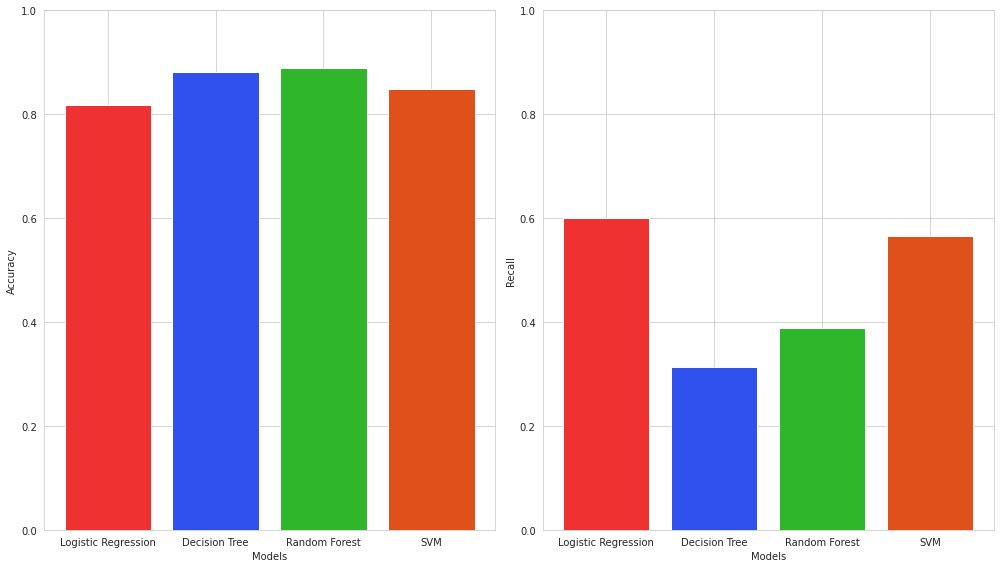

In [52]:
import matplotlib.pyplot as plt

fig_2, ax = plt.subplots(1, 2, figsize=(14, 8))
ax[0].bar(['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'], [cl1_final_accuracy, cl2_final_accuracy, cl3_final_accuracy, cl4_final_accuracy], color=["#EF3131", "#3151EF", "#2FB62A", "#DF501B"])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel("Models")
ax[0].set_ylabel("Accuracy")
ax[1].bar(['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'], [cl1_final_recall, cl2_final_recall, cl3_final_recall, cl4_final_recall], color=["#EF3131", "#3151EF", "#2FB62A", "#DF501B"])
ax[1].set_ylim([0, 1])
ax[1].set_xlabel("Models")
ax[1].set_ylabel("Recall")
plt.tight_layout()
plt.show()